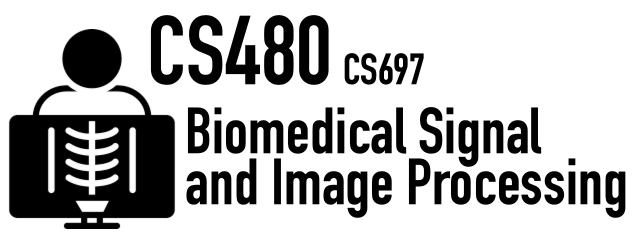
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 6.8MB/s 


In [3]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [4]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [5]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

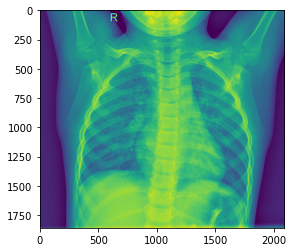

In [6]:
# Display image:
plt.imshow(img)

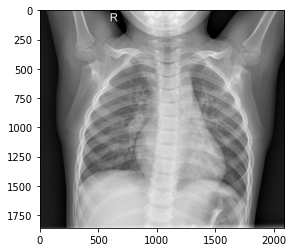

In [7]:
# Display in gray looks more like Xray :)
plt.imshow(img, cmap="gray")

In [8]:
# Dimensions:
img.shape

(1858, 2090)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [9]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [10]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1)
# TODO: Operation 2)

Operation 1) `mh.imresize( loaded_image, (300, 300) ) `

Resizes the images in the for loop with new dimensions.

Operation 2) `pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image`  

We put the loaded images into the array pneumonia_images at index i with their dimensions, this will create kind of a "stack of images".

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [79]:
def load_images(img_type, num_images):
  fig = plt.figure(figsize=[25,25])
  for i in range(num_images):
    fig.add_subplot(1, num_images, i + 1)
    plt.title(i)
    plt.imshow(img_type[i], cmap="gray")
  plt.show(block=True)

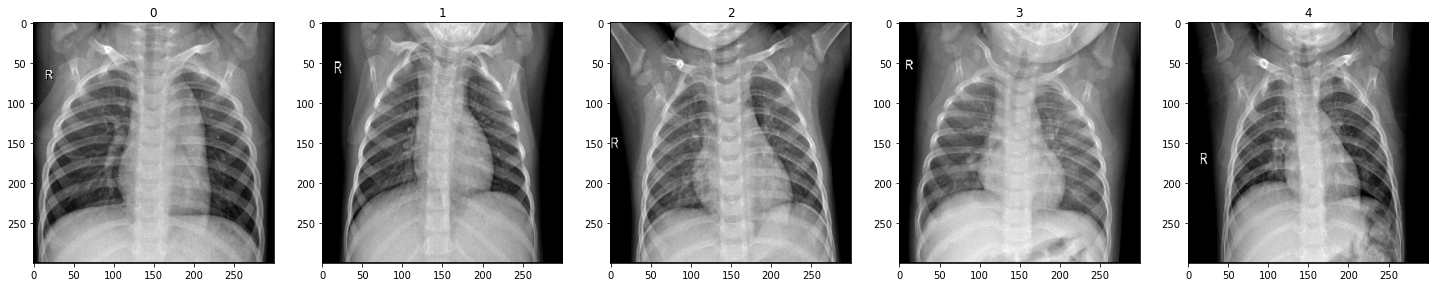

In [13]:
# First five normal images
load_images(normal_images, 5)

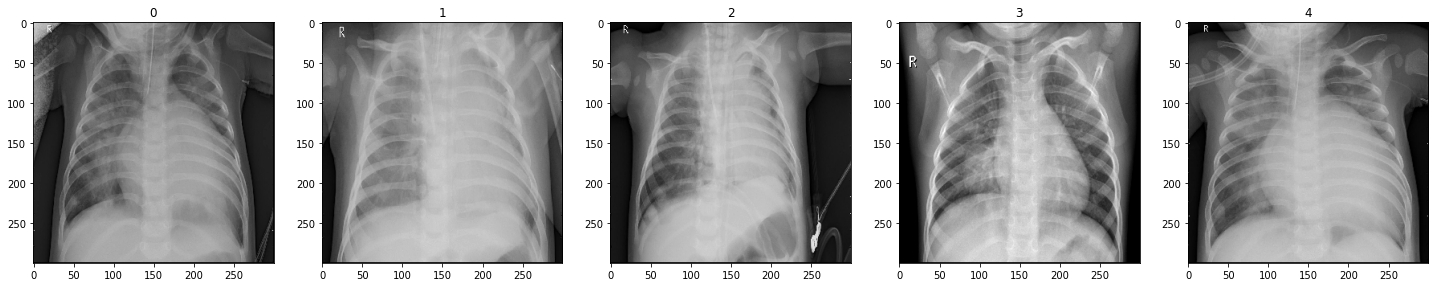

In [14]:
# First five pneumonia images
load_images(pneumonia_images, 5)

**Task 3:** Setup training and testing data. [15 Points]

In [15]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [16]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [17]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.concatenate((np.zeros(TRAINING_COUNT, dtype=np.float32), np.ones(TRAINING_COUNT,  dtype=np.float32)))
training_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.], dtype=float32)

In [18]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [19]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.concatenate((np.zeros(TESTING_COUNT, dtype=np.float32), np.ones(TESTING_COUNT,  dtype=np.float32)))
testing_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [34]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [35]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [36]:
# TODO: In just a few sentences, please explain how the Random Forest works.

The random forest algorithm grows a number of regression trees which are altogether called a random forest (classifier). While all trees in the forest yield the same distribution, each tree depends on the values of an independently sampled random predictor. It chooses the best split of variables among a subset of predic­tors randomly chosen at that node. Finally, it concludes the predictions of multiple decision trees. 

*(I summarized this from the following references: (1) L., A., and M. Wiener (2002). Classification and regression by randomforest. (2) L. Breiman (2001). Random forests. Machine learning.)*

In our case for the Kaggle Dataset the decision trees of the random forest will decide between the class normal 0 and pneumonia 1 and then conclude their final prediction.

In [37]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9375

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?
# TODO: YOUR ANSWER

The accuracy of 93.75% is quite good for such a simple model as random forest, especially since we only had a dataset of 120 images. However, it is not the best accuracy we can achieve. I run the random forest multiple times and received accurancies between 88% and 95%.




**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER

In [83]:
predictions = clf.predict(testing_data)

In [84]:
misclassified = [i for i in range(len(testing_target)) if testing_target[i] != predictions[i]]

In [87]:
num_misclassified = len(misclassified)
misclassified_images = [testing_data[i] for i in misclassified]

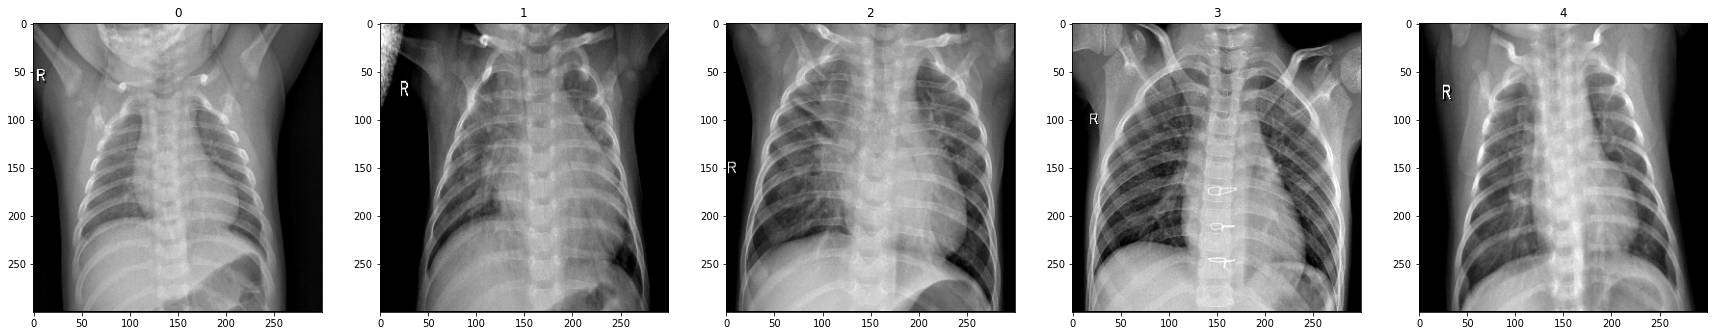

In [108]:
fig = plt.figure(figsize=[30,30])
for i in range(num_misclassified):
  fig.add_subplot(1, num_misclassified, i + 1)
  plt.title(i)
  plt.imshow(testing_data[misclassified[i]].reshape((300,300)), cmap="gray")
plt.show(block=True)

From the images it is hard to tell why they have been misclassified. Some of them, e.g. number 1 and 3, still have a lot of dark/black parts in the image compared to the pneumonia images above where the lung seems much more gray/light. Another idea is that there were other unknown features which the classifier used for its decision, for example, if the subject is in the hospital the xray might show tubes to the chest etc.

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

Without trying another model like a neural network we could: 

*   Try a different training / test split: e.g. 80% training images and 20%
test images (The more training images, the better).
*   Add more images to the dataset in general (if available)
*   Play around with different hyperparameters of the sklearn random forest classifier to improve accuracy (e.g. more trees in the forest, change function to measure the quality of a split, change depth of the decision trees etc.)
*   Tune the images or do some data prepocessing on the images: for example use another colormap, increase the image contrast, remove noise etc.






In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw